Dataset using Twitter data, is was used to research hate-speech detection. The text is classified as: hate-speech, offensive language, and neither


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_twitter=pd.read_csv("train.csv")

In [3]:
df_twitter.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


<Axes: xlabel='label', ylabel='count'>

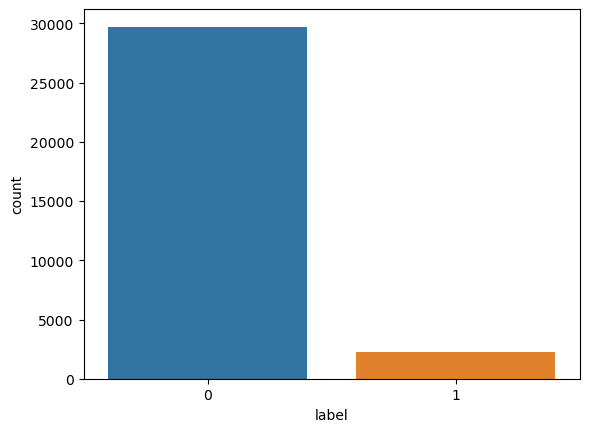

In [4]:
sns.countplot(data=df_twitter, x='label')


From the above plot we can see that classes are imbalanced, we will fix it later.

In [5]:
# Checking the shape of the data
df_twitter.shape

(31962, 3)

In [6]:
# Cheking if null values are present in the dataset or not.
df_twitter.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [7]:
df_twitter.drop('id',axis=1,inplace=True)

In [8]:
df_twitter

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


In [9]:
df_offensive=pd.read_csv("labeled_data.csv")

In [10]:
df_offensive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [11]:
df_offensive

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [12]:
df_offensive.shape


(24783, 7)

In [13]:
df_offensive.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [14]:
df_offensive.head(3)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...


In [15]:
df_offensive['class'].unique()

array([2, 1, 0], dtype=int64)

In [16]:
df_offensive["labels"] = df_offensive["class"].map({0: "Hate Speech", 
                                    1: "Offensive Language", 
                                    2: "No Hate and Offensive"})
print(df_offensive.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet                 labels  
0  !!! RT @mayasolovely: As a woman you shouldn't...  No Hate and Offensive  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...     Offensive Language  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...     Offensive Language  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...     Offensive Language  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...     Offensive Language  


In [17]:
df_offensive.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,labels
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,No Hate and Offensive
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language


In [18]:
# analysing some data
print(df_offensive["tweet"].iloc[0],"\n")
print(df_offensive["tweet"].iloc[1],"\n")
print(df_offensive["tweet"].iloc[2],"\n")
print(df_offensive["tweet"].iloc[3],"\n")


!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out... 

!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!! 

!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit 

!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny 



In [19]:
# to see distribution of labels
df_offensive['labels'].value_counts()

labels
Offensive Language       19190
No Hate and Offensive     4163
Hate Speech               1430
Name: count, dtype: int64

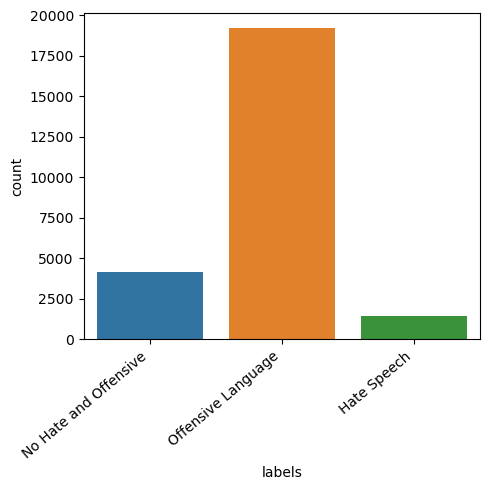

In [20]:
# to visualize the data using a count plot
fig = plt.figure(figsize=(5,5))
ax = sns.countplot(x='labels', data=df_offensive)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of sentiments')

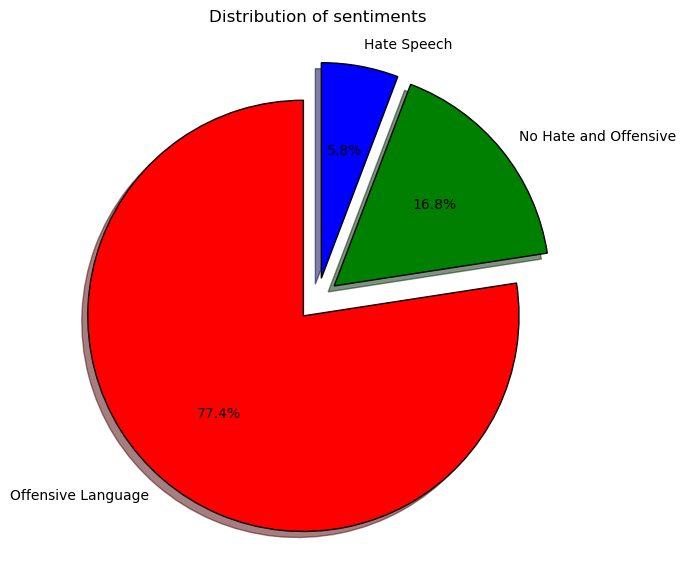

In [21]:
# visualizing data using piechart
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green', 'blue')
wp = {'linewidth':1, "edgecolor":'black'}
tags = df_offensive['labels'].value_counts()
explode=(0.1,0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title("Distribution of sentiments")

#here 0 indicates hate speech, 1 indicates offensive Language & 2 indicates no hate & offensive

In [22]:
df_offensive.drop(['Unnamed: 0','count','hate_speech','offensive_language','neither'],axis=1,inplace=True)

In [23]:
df_offensive['class'].unique()

array([2, 1, 0], dtype=int64)

In [24]:
df_offensive[df_offensive['class']==0]['class']=1

C:\Users\sawan\AppData\Local\Temp\ipykernel_17076\2275510384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_offensive[df_offensive['class']==0]['class']=1


In [25]:
df_offensive['class'].unique()

array([2, 1, 0], dtype=int64)

In [26]:
df_offensive[df_offensive['class']==0]

,class,tweet,labels
85,0,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1...",Hate Speech
89,0,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ...",Hate Speech
110,0,"""@DevilGrimz: @VigxRArts you're fucking gay, b...",Hate Speech
184,0,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL...",Hate Speech
202,0,"""@NoChillPaz: ""At least I'm not a nigger"" http...",Hate Speech
...,...,...,...
24576,0,this guy is the biggest faggot omfg,Hate Speech
24685,0,which one of these names is more offensive kik...,Hate Speech
24751,0,you a pussy ass nigga and I know it nigga.,Hate Speech
24776,0,you're all niggers,Hate Speech


In [27]:
df_offensive["class"].replace({0: 1}, inplace=True)

In [28]:
df_offensive['class'].unique()

array([2, 1], dtype=int64)

In [ ]:
sns.countplot('class',data=df_offensive)

In [29]:
df_offensive[df_offensive['class']==0]

,class,tweet,labels


In [30]:
df_offensive["class"].replace({2: 0}, inplace=True)

<Axes: xlabel='class', ylabel='count'>

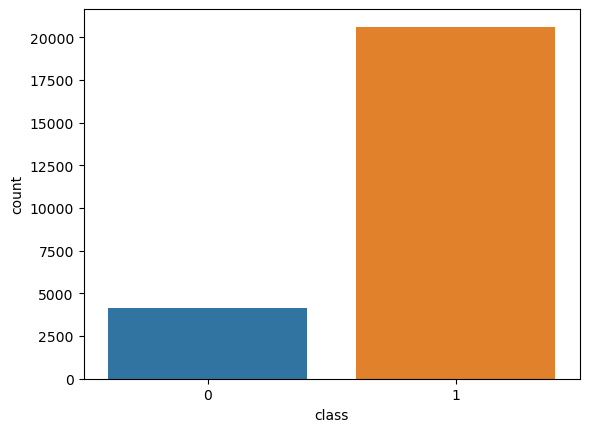

In [31]:
sns.countplot(data=df_offensive, x='class')


In [32]:
df_offensive.rename(columns ={'class':'label'}, inplace = True)
   

In [33]:
frame=[df_twitter,df_offensive]
df = pd.concat(frame)

<Axes: xlabel='label', ylabel='count'>

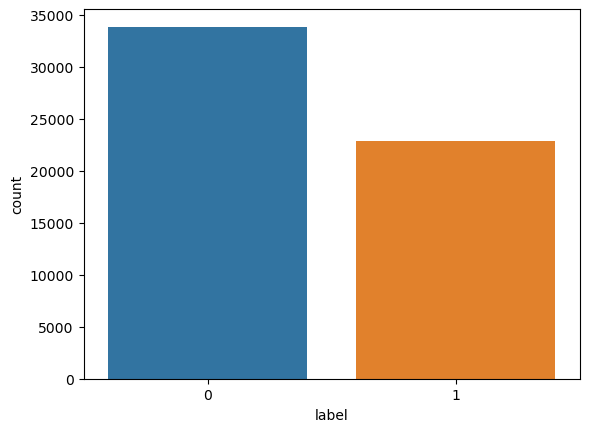

In [34]:
sns.countplot(data=df, x='label')


In [35]:
import re
import nltk
stemmer = nltk.SnowballStemmer("english") # stemmer will be used to reduce words to their root form (e.g., "running" -> "run")
from nltk.corpus import stopwords #Stop words are common words that don't carry much meaning on their own
import string
stopword=set(stopwords.words('english'))


In [36]:
#lets perform sum text cleaning operations
def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)  #remove square brackets its might capture unwanted info
    text = re.sub('https?://\S+|www\.\S+', '', text)  #using regular expression urls is been removed so processed text should contain html code
    text = re.sub('<.*?>+', '', text)  #eliminating punctuations
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)  #removing \n..consistent text should be there
    text = re.sub('\w*\d\w*', '', text)   #remove words containing alphanumeric characters and digits (userid123,2nd)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]  #reducing word variations and improving text analysis.
    text=" ".join(text)
    return text   #return cleaned and processed text

In [37]:
df['tweet']=df['tweet'].apply(clean_text)  #applied on overall dataset

In [38]:
df.to_csv('test.csv',index=False)

In [39]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
  

In [40]:
def make_wordcloud(df):
    comment_words=""   #empty string to store all the tweet text concatenated together.
    for val in df.tweet: 
        val = str(val).lower()  #convert to lower for consistent processing

      
        comment_words += " ".join(val)+" "   #concatenate all strings with seprated spaces
    print(comment_words[0:100])  #print 100 characters
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,min_font_size = 10).generate(comment_words)
  
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

In [41]:
# make_wordcloud(df[df['label']==0])
df.to_csv('testing.csv',index=False)

In [42]:
x=df['tweet']
y=df['label']
type(x)

pandas.core.series.Series

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)


In [44]:
print(len(x_train),len(y_train))
print(len(x_test),len(y_test))

42558 42558
14187 14187


In [45]:
type(x_test), type(y_test), type(x_train), type(y_train)

(pandas.core.series.Series,
 pandas.core.series.Series,
 pandas.core.series.Series,
 pandas.core.series.Series)

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english', ngram_range=(1,5))  #stopwords ='english' (remove common english words)
x_train_vectorizer=count.fit_transform(x_train)

In [47]:
# Assuming count is your CountVectorizer object and x_test is your test data
x_test_vectorizer = count.transform(x_test)


In [48]:
from sklearn.feature_extraction.text import TfidfTransformer 
tfidf = TfidfTransformer()


In [49]:
x_train_tfidf = tfidf.fit_transform(x_train_vectorizer)
x_test_tfidf = tfidf.transform(x_test_vectorizer)

In [50]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [51]:
model_vectorizer= MultinomialNB().fit(x_train_vectorizer, y_train)
prediction_vectorizer=model_vectorizer.predict(x_test_vectorizer)
print(confusion_matrix(y_test,prediction_vectorizer))
print (classification_report(y_test, prediction_vectorizer))

[[7878  575]
 [ 458 5276]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      8453
           1       0.90      0.92      0.91      5734

    accuracy                           0.93     14187
   macro avg       0.92      0.93      0.92     14187
weighted avg       0.93      0.93      0.93     14187



In [52]:
model_tfidf= MultinomialNB().fit(x_train_tfidf, y_train)
prediction_tfidf=model_tfidf.predict(x_test_tfidf)
print (classification_report(y_test, prediction_tfidf))
print(confusion_matrix(y_test,prediction_tfidf))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      8453
           1       0.95      0.85      0.90      5734

    accuracy                           0.92     14187
   macro avg       0.93      0.91      0.92     14187
weighted avg       0.92      0.92      0.92     14187

[[8213  240]
 [ 860 4874]]


In [53]:
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding,SpatialDropout1D
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.models import Sequential


In [54]:
max_words = 50000
max_len = 300
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [55]:
model = Sequential()
model.add(Embedding(max_words, 100, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 100)          5000000   
                                                                 
 spatial_dropout1d (Spatial  (None, 300, 100)          0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 5080501 (19.38 MB)
Trainable params: 5080501 (19.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
from keras.callbacks import EarlyStopping,ModelCheckpoint

stop = EarlyStopping(
    monitor='val_accuracy', 
    mode='max',
    patience=5
)

checkpoint= ModelCheckpoint(
    filepath='./',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [57]:
history=model.fit(sequences_matrix,y_train,batch_size=64,epochs=5,
          validation_split=0.1,callbacks=[stop,checkpoint])

Epoch 1/5


599/599 [==============================] - 333s 551ms/step - loss: 0.2501 - accuracy: 0.9037 - val_loss: 0.2371 - val_accuracy: 0.9295
Epoch 2/5
599/599 [==============================] - 348s 581ms/step - loss: 0.1650 - accuracy: 0.9432 - val_loss: 0.1614 - val_accuracy: 0.9427
Epoch 3/5
599/599 [==============================] - 443s 741ms/step - loss: 0.1399 - accuracy: 0.9530 - val_loss: 0.1667 - val_accuracy: 0.9389
Epoch 4/5
599/599 [==============================] - 359s 600ms/step - loss: 0.1247 - accuracy: 0.9599 - val_loss: 0.1662 - val_accuracy: 0.9420
Epoch 5/5
599/599 [==============================] - 369s 617ms/step - loss: 0.1131 - accuracy: 0.9637 - val_loss: 0.1646 - val_accuracy: 0.9424


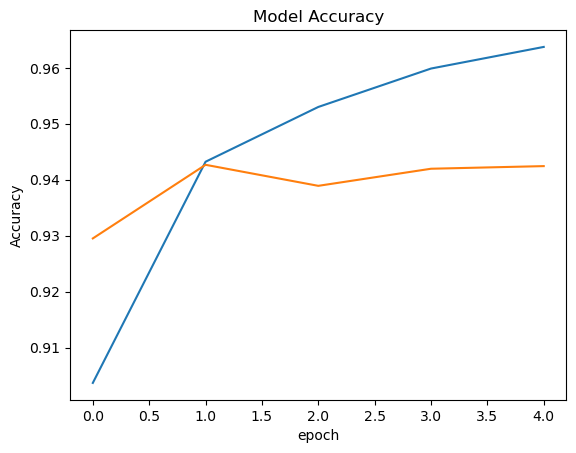

In [58]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
#plt.legend(['train'],loc='upper left')
plt.show()

In [59]:
test_sequences = tokenizer.texts_to_sequences(x_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)


In [60]:
accr = model.evaluate(test_sequences_matrix,y_test)


444/444 [==============================] - 24s 54ms/step - loss: 0.1738 - accuracy: 0.9429


In [61]:
lstm_prediction=model.predict(test_sequences_matrix)


444/444 [==============================] - 27s 60ms/step


In [62]:
res=[]
for prediction in lstm_prediction:
    if prediction[0]<0.5:
        res.append(0)
    else:
        res.append(1)

In [63]:
print(confusion_matrix(y_test,res))


[[8190  263]
 [ 547 5187]]


In [68]:
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [69]:
model.save("hate&abusive_model.h5")

In [70]:
import keras

In [71]:
load_model=keras.models.load_model("./hate&abusive_model.h5")
with open('tokenizer.pickle', 'rb') as handle:
    load_tokenizer = pickle.load(handle)

In [72]:
test = 'YOU LOOK\S %S  FUCKING UGLY'
test=[clean_text(test)]
print(test)
seq = load_tokenizer.texts_to_sequences(test)
padded = sequence.pad_sequences(seq, maxlen=300)
print(seq)
pred = load_model.predict(padded)
print("pred", pred)
if pred<0.5:
    print("no hate")
else:
    print("hate and abusive")

['look  fuck ugli']
[[26, 12, 256]]
1/1 [==============================] - 0s 243ms/step
pred [[0.8969715]]
hate and abusive


In [73]:
test = 'you * look % like a $@% dumb MonKey '
test=[clean_text(test)]
print(test)
seq = load_tokenizer.texts_to_sequences(test)
padded = sequence.pad_sequences(seq, maxlen=300)
print(seq)
pred = load_model.predict(padded)
print("pred", pred)
if pred<0.5:
    print("no hate")
else:
    print("hate and abusive")

[' look  like  dumb monkey ']
[[26, 5, 232, 409]]
1/1 [==============================] - 0s 48ms/step
pred [[0.5436253]]
hate and abusive


In [74]:
test = 'YOU LOOK\S %S  pretty 1 3 2'
test=[clean_text(test)]
print(test)
seq = load_tokenizer.texts_to_sequences(test)
padded = sequence.pad_sequences(seq, maxlen=300)
print(seq)
pred = load_model.predict(padded)
print("pred", pred)
if pred<0.5:
    print("no hate")
else:
    print("hate and abusive")

['look  pretti   ']
[[26, 292]]
1/1 [==============================] - 0s 49ms/step
pred [[0.02732124]]
no hate
